# Visualisation of quantum circuits

In [1]:
%matplotlib inline

import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

c:\users\anton\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


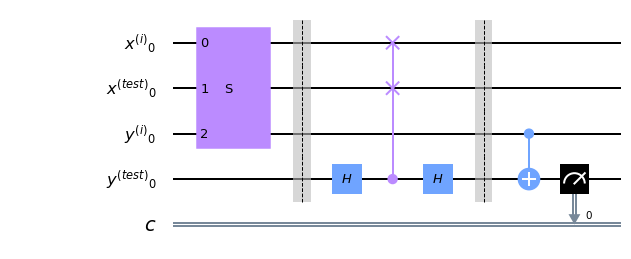

In [2]:
x_train = QuantumRegister(1, 'x^{(i)}')
x_test = QuantumRegister(1, 'x^{(test)}')
y_train = QuantumRegister(1, 'y^{(i)}')
y_test = QuantumRegister(1, 'y^{(test)}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(x_train, x_test, y_train, y_test, c)

S = Gate(name='  S  ', num_qubits=3, params=[])
qc.append(S, [x_train, x_test, y_train])
qc.barrier()
qc.h(y_test)
qc.cswap(y_test, x_train, x_test)
qc.h(y_test)
qc.barrier()
qc.cx(y_train, y_test)
qc.measure(y_test, c)

#qc = cos_classifier(x_tr, x_ts, y_tr)
qc.draw(output='mpl', scale=.7, 
        idle_wires =False, with_layout=False, 
        interactive=True, justify='left', initial_state =True, 
        filename='output/cosine_circuit.png')

In [3]:
d = 2
n_obs = 4
control = QuantumRegister(d, 'd')
data = QuantumRegister(n_obs, 'x')
labels = QuantumRegister(n_obs, 'y')
data_test = QuantumRegister(1, 'x^{test}')
label_test = QuantumRegister(1, 'y^{test}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(control, data, labels, data_test, label_test, c)

# for index in range(n_obs):
#     qc.initialize(X_data[index], [data[index]])
#     qc.initialize(Y_data[index], [labels[index]])

S = Gate(name='   S   ', num_qubits=8, params=[])
qc.append(S, [data[0], data[1], data[2], data[3],
              labels[0], labels[1], labels[2], labels[3]])


# for i in range(d):
#     qc.h(control[i])

W = Gate(name='   W   ', num_qubits=2, params=[])
qc.append(W, [control[0], control[1]])


U1 = [0, 2]  # np.random.choice(range(4), 2, replace=False)
U2 = [1, 3]  # np.random.choice(range(4), 2, replace=False)
U4 = [2,3]  # np.random.choice(range(4), 2, replace=False)

qc.barrier()

# U1
qc.cswap(control[0], data[int(U1[0])], data[int(U1[1])])
qc.cswap(control[0], labels[int(U1[0])], labels[int(U1[1])])

qc.x(control[0])

# U2
qc.cswap(control[0], data[int(U2[0])], data[int(U2[1])])
qc.cswap(control[0], labels[int(U2[0])], labels[int(U2[1])])

qc.barrier()

# U3
# qc.cswap(control[1], data[int(U3[0])], data[int(U3[1])])
# qc.cswap(control[1], labels[int(U3[0])], labels[int(U3[1])])

qc.x(control[1])

# U4
qc.cswap(control[1], data[int(U4[0])], data[int(U4[1])])
qc.cswap(control[1], labels[int(U4[0])], labels[int(U4[1])])

qc.barrier()
#qc.initialize(x_test, [data_test[0]])
S_test = Gate(name='$S_{(test)}$', num_qubits=2, params=[])
qc.append(S_test, [data_test, label_test])

qc.barrier()

# F
ix_cls = 3
# qc.h(labels[ix_cls])
# qc.cswap(labels[ix_cls], data[ix_cls], test[0])
# qc.h(labels[ix_cls])
# qc.measure(labels[ix_cls], c)
qc.h(label_test[0])
qc.cswap(label_test[0], data[ix_cls], data_test[0])
qc.h(label_test[0])
qc.cx(labels[ix_cls], label_test[0])
qc.measure(label_test[0], c)


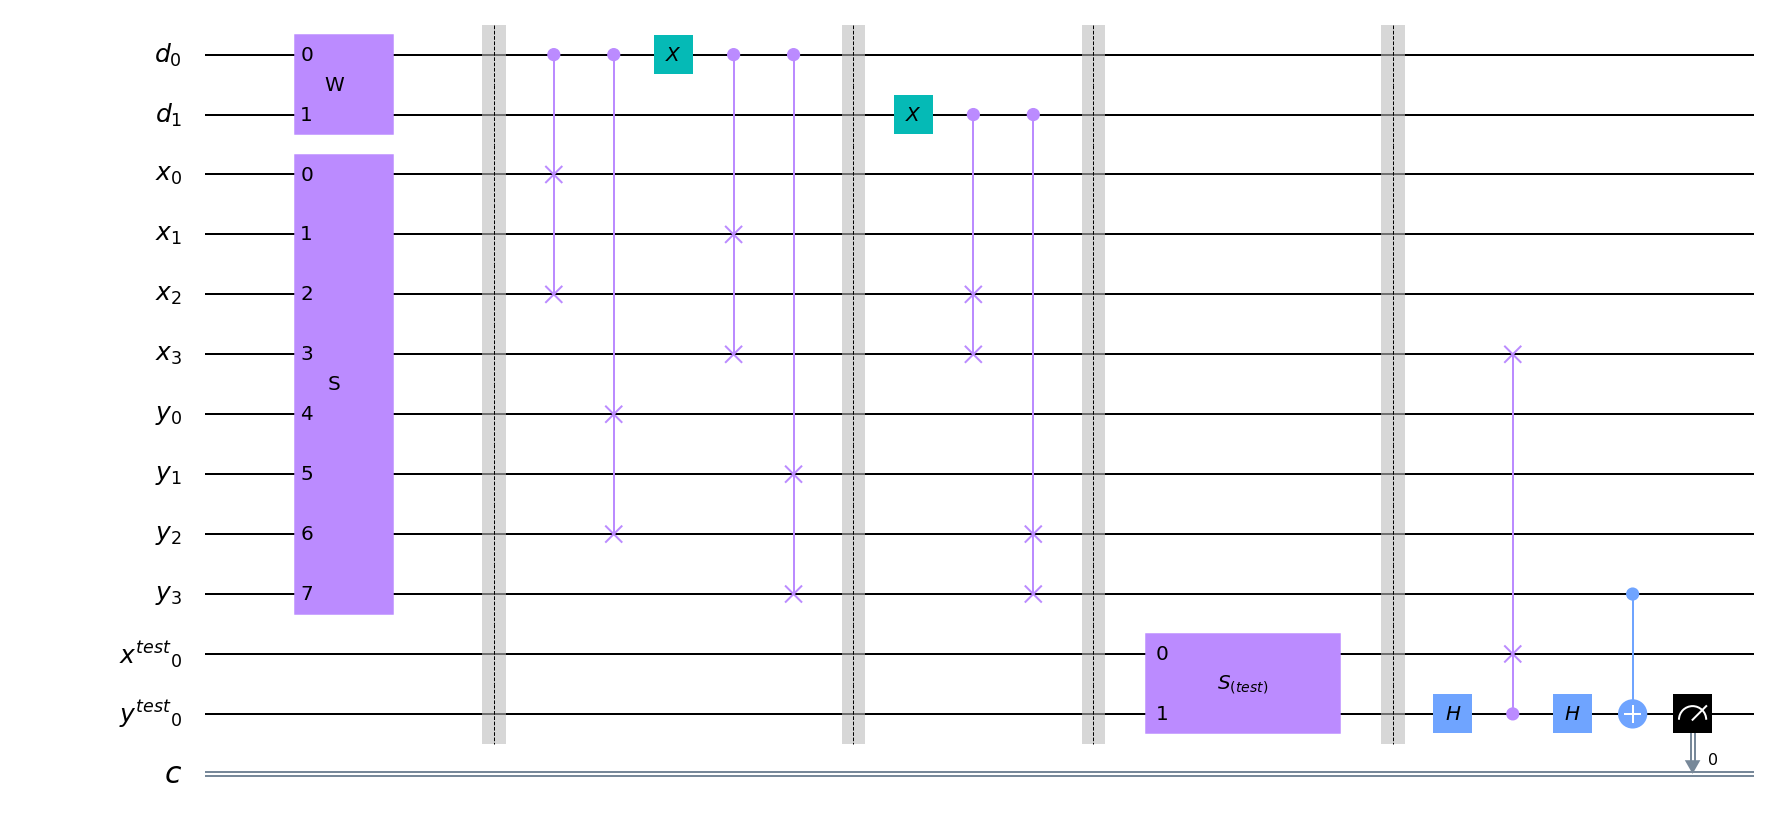

In [5]:
#qc = ensemble_fixed_U(X_data, Y_data, x_test)
qc.draw(output='mpl', scale=.6, filename='output/ensemble_circuit.png', style={'fontsize':20, 'dpi':300}, vertical_compression='high')

In [49]:
d = 2
n_obs = 4
control = QuantumRegister(d, 'd')
data = QuantumRegister(n_obs, 'x')
labels = QuantumRegister(n_obs, 'y')
data_test = QuantumRegister(1, 'x^{test}')
label_test = QuantumRegister(1, 'y^{test}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(control, data, labels, data_test, label_test, c)

# for index in range(n_obs):
#     qc.initialize(X_data[index], [data[index]])
#     qc.initialize(Y_data[index], [labels[index]])

S = Gate(name='   S   ', num_qubits=8, params=[])
qc.append(S, [data[0], data[1], data[2], data[3],
              labels[0], labels[1], labels[2], labels[3]])


# for i in range(d):
#     qc.h(control[i])

W = Gate(name='   W   ', num_qubits=2, params=[])
qc.append(W, [control[0], control[1]])


U1 = [0, 2]  # np.random.choice(range(4), 2, replace=False)
U2 = [1, 3]  # np.random.choice(range(4), 2, replace=False)
U4 = [2,3]  # np.random.choice(range(4), 2, replace=False)

qc.barrier()

# U1
qc.cswap(control[0], data[int(U1[0])], data[int(U1[1])])
qc.cswap(control[0], labels[int(U1[0])], labels[int(U1[1])])

qc.x(control[0])

# U2
qc.cswap(control[0], data[int(U2[0])], data[int(U2[1])])
qc.cswap(control[0], labels[int(U2[0])], labels[int(U2[1])])

qc.barrier()

# U3
# qc.cswap(control[1], data[int(U3[0])], data[int(U3[1])])
# qc.cswap(control[1], labels[int(U3[0])], labels[int(U3[1])])

qc.x(control[1])

# U4
qc.cswap(control[1], data[int(U4[0])], data[int(U4[1])])
qc.cswap(control[1], labels[int(U4[0])], labels[int(U4[1])])

qc.barrier()
#qc.initialize(x_test, [data_test[0]])
S_test = Gate(name='$S_{(test)}$', num_qubits=2, params=[])
qc.append(S_test, [data_test, label_test])

qc.barrier()

# F
ix_cls = 3
# qc.h(labels[ix_cls])
# qc.cswap(labels[ix_cls], data[ix_cls], test[0])
# qc.h(labels[ix_cls])
# qc.measure(labels[ix_cls], c)
qc.h(label_test[0])
qc.cswap(label_test[0], data[ix_cls], data_test[0])
qc.h(label_test[0])
qc.cx(labels[ix_cls], label_test[0])
qc.measure(label_test[0], c)
def w(qcirc,qin,qaux):
    for i in range(0,3):
        qcirc.h(qin[i])
        qc.x(qinput[i])

qinput=data
w(qc, data, label_test)

C:\Users\anton\Anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\matplotlib.py:144: DeprecationWarning: style option/s (plotbarrier) is/are not supported
  self._style.set_style(style)


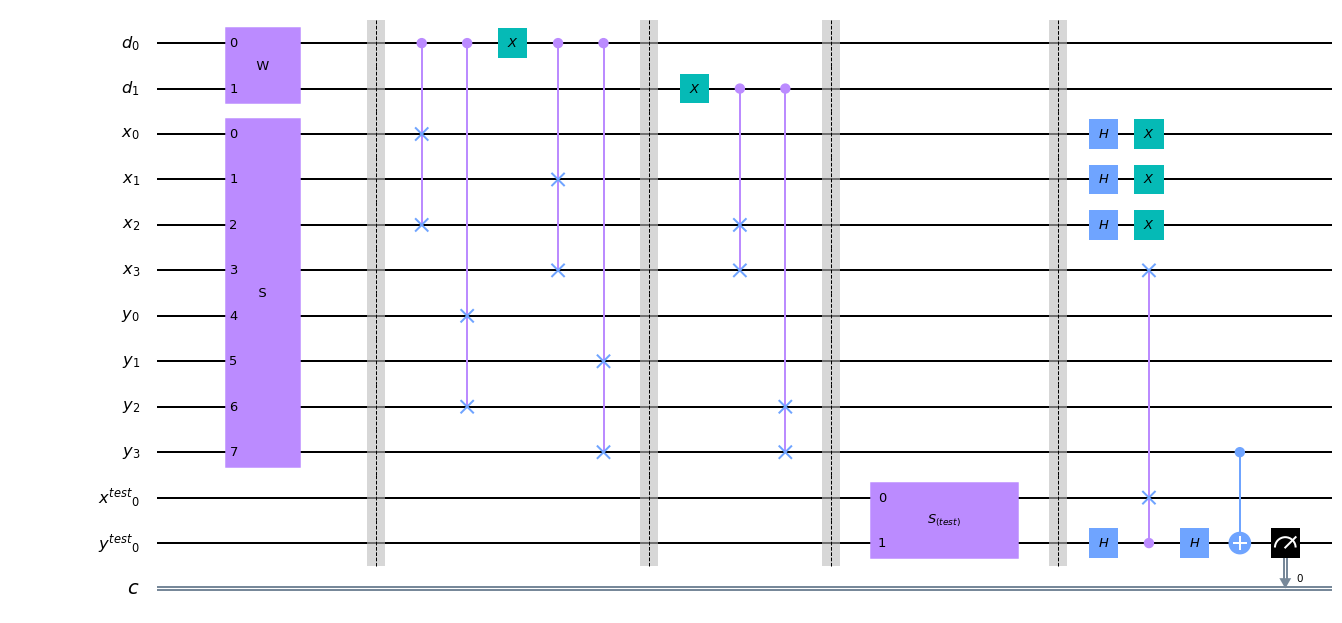

In [50]:
# Visualize the circuit.
from qiskit.visualization import circuit_drawer as drawer
my_style = {'plotbarrier': True}
my_scheme=qx_color_scheme()
my_scheme['plotbarrier'] = False
#drawer(qc, style=my_scheme)
drawer(qc, style=my_style,output='mpl')

# Theoretical performance of Bagging Ensemble

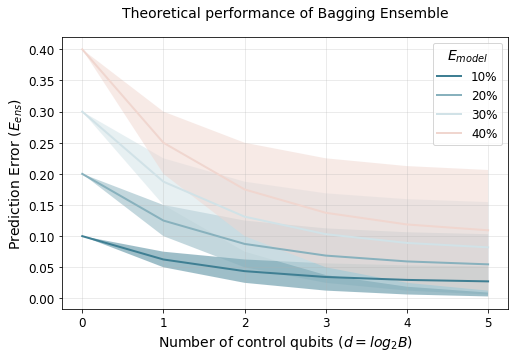

In [46]:
q = np.arange(6)
T = 2**q

colors = ['lawngreen', 'lightgreen', 'g', 'palegoldenrod']

errs = np.array([0.1, 0.2, 0.3, 0.4])#, 0.49])
ro = [0.00, 0.25, 0.5] #np.arange(0.5, 1, 0.05)

import seaborn as sns

colors = sns.diverging_palette(220, 20, n=6)
# colors = colors[::-1]


# plot it!
fig, ax = plt.subplots(1, figsize=(8,5))

for i in np.arange(len(errs)):
    err = errs[i]
    color = colors[i]
    # print(err)
    mean = ((1+ro[1]*(T-1))/T)*err
    lower = mean - ((1+ro[0]*(T-1))/T)*err
    upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
    ax.plot(q, mean, lw=2, label = str(int(err*100))+'%', color=color)
    ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
#ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.set_title('Theoretical performance of Bagging Ensemble', size=14).set_position([.5, 1.05])
legend=ax.legend(loc='upper right', title = '$E_{model}$', prop=dict(size=12))
ax.set_xlabel(r'Number of control qubits $(d=log_2B)$', size=14)
ax.set_ylabel('Prediction Error ($E_{ens}$)', size=14)
#ax.set_yticklabels([0, 0.0, 0.1, 0.2, 0.3, 0.4], size=12)
#ax.set_xticklabels([0, 0, 1, 2, 3, 4, 5], size=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(alpha=.3)
legend.get_title().set_fontsize('14')
# ax1 = ax.twiny()
# ax1.set_xlabel(r'Ensemble size $(B)$', size=14)
# ax1.set_xticklabels([1, 2, 4, 8, 16, 32], size=12)
# #ax1.set_xticks(np.linspace(.48, ax.get_xbound()[1]+5, 5))
plt.savefig('output/theory_ensemble_performance.png', dpi =300)
plt.show()

In [14]:
T
mean
ro

[0.0, 0.25, 0.5]